# Gradient Descent

According to Wikipedia, "In mathematics, gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function". It is a machine learning algorithm that operates iteratively to find the optimal values for its parameters which are then fed to the machine learning model to build a model which predicts a value with minimal error. 


The gradient descent algorithm is given below -


1.   Choose a starting point or the initialization of values
2.   Calculate the gradient at this point
3.   Make a scaled step in the opposite direction to the gradient in order to minimize it
4.   Repeat step 2 and step 3 until local minima is reached



The mathematical formula for this algorithm is given by-

\begin{align}
    f_n(x) = f_{n-1}(x) - alpha * g'(f_{n-1}(x))
  \end{align}

where $f_n(x)$ represents the parameter's value at iteration n, alpha is the learning rate and the function g represents the cost function that needs to be minimized. 

We will build this algorithm step by step. First, we will learn to calculate the gradient of a function. One of the ways is to calculate the gradient manually and plug in the values. We can also directly calculate the gradient using PyTorch's autograd. It returns a function which is a differentiation of the given function. You can read the documentation [here](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#:~:text=autograd%20is%20PyTorch's%20automatic%20differentiation,helps%20a%20neural%20network%20train.).

Given the following function

\begin{align}
    g(x)= 2*x^3 + x*sin(x) + 5 
  \end{align}

We can Calculate the value of the gradient at x = 30.

In [2]:
!conda install -c conda-forge autograd -y
from autograd import grad
import autograd.numpy as np

def implement_g(x):
    # Write your code here
    return x**2 + 3*x + 2
    
def try_autograd(x):
    # We pass the function g(x) as an input to this grad function from autograd
    gradient = grad(implement_g)
    ans = gradient(x)
    return ans

print("Gradient of g(x)=x^2+3x+2 at x=30:", try_autograd(30.0))

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.

Gradient of g(x)=x^2+3x+2 at x=30: 63.0


Now that we know how to calculate the gradient, we will implement the gradient descent algorithm for a given set of values.

Let the learning rate or alpha be 0.5 and the number of iterations be 100. We Calculate the parameter value at every step of the iteration and store them in an array and return the array. We Use the autograd function as before to calculate the gradient of the given function. 

\begin{align}
    g(x) = |x|
  \end{align}

Let the initial value of f(x) be $f_0(x)$ = 1.75.

In [3]:
def implement_new_g(x):
    return (x-2)**2
    
def gradient_descent(g, w0, alpha, n):
    parameter_history = []
    w = w0
    grad_g = grad(g)
    
    for i in range(n):
        parameter_history.append(w)
        w = w - alpha * grad_g(w)

    return parameter_history

param_hist = gradient_descent(implement_new_g, 1.75, 0.5, 100)
print("gradient Descent Parameter History:\n", param_hist)

gradient Descent Parameter History:
 [1.75, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


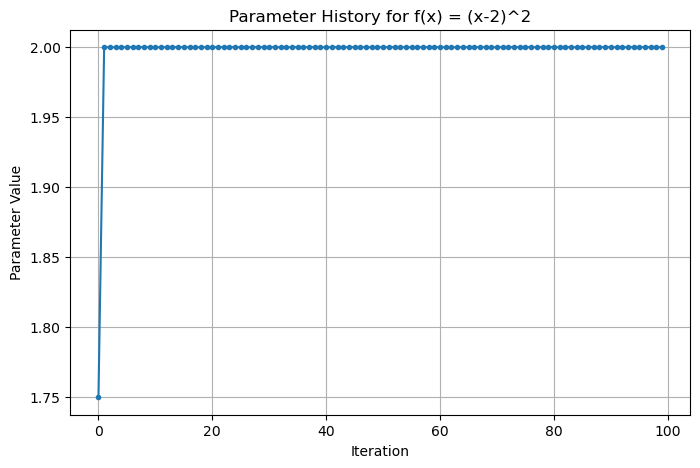

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(param_hist, marker='o', markersize=3)
plt.title("Parameter History for f(x) = (x-2)^2")
plt.xlabel("Iteration")
plt.ylabel("Parameter Value")
plt.grid(True)
plt.show()

We will now do 2 runs

*Run 1*: \\
g = square root of (x* x* x)

w = 1.0

max_its=100

alpha=0.1

*Run 2*: \\
g = square root of (x*x)

w = 1.5

max_its=100

alpha=0.01

c:\Users\takak\anaconda3\envs\math-ml\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in sqrt
  return f_raw(*args, **kwargs)
c:\Users\takak\anaconda3\envs\math-ml\lib\site-packages\autograd\numpy\numpy_vjps.py:98: RuntimeWarning: invalid value encountered in scalar power
  defvjp(anp.sqrt,    lambda ans, x : lambda g: g * 0.5 * x**-0.5)


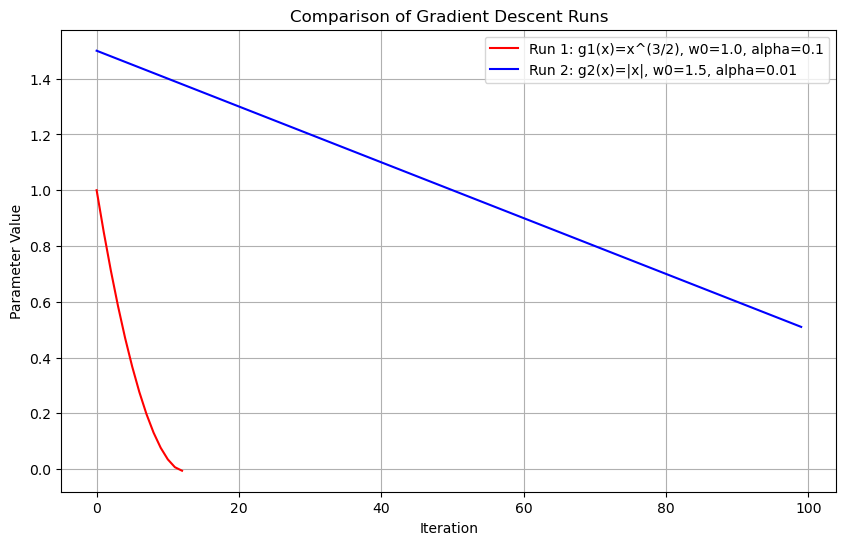

In [5]:
## Write your code here
def implement_g1(x):
    return np.sqrt(x**3)

def implement_g2(x):
    return np.sqrt(x**2)

def run_gradient_descent(g, w0, alpha, n):
    history = []
    w=w0
    grad_func = grad(g)
    for i in range(n):
        history.append(w)
        w = w - alpha * grad_func(w)
    return history

w0_run1 = 1.0
alpha_run1 = 0.1
its_run1 = 100
history1 = run_gradient_descent(implement_g1, w0_run1, alpha_run1, its_run1)

w0_run2 = 1.5
alpha_run2 = 0.01
its_run2 = 100
history2 = run_gradient_descent(implement_g2, w0_run2, alpha_run2, its_run2)

plt.figure(figsize=(10, 6))
plt.plot(history1, color='red', label='Run 1: g1(x)=x^(3/2), w0=1.0, alpha=0.1')
plt.plot(history2, color='blue', label='Run 2: g2(x)=|x|, w0=1.5, alpha=0.01')
plt.title("Comparison of Gradient Descent Runs")
plt.xlabel("Iteration")
plt.ylabel("Parameter Value")
plt.legend()
plt.grid(True)
plt.show()